### Libraries

In [3]:
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import binomtest
from statsmodels.stats.multitest import multipletests
import numpy as np
import math
from math import log10

import random

### Data

In [5]:
### Sample sheet
file_path = 'Data/TCGA/Gene level CNV/gdc_sample_sheet.2025-11-03.tsv'
sample_sheet = pd.read_csv(file_path, sep = '\t')

In [6]:
sample_sheet

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Tissue Type,Tumor Descriptor,Specimen Type,Preservation Method
0,21f39dce-e4a6-41e0-a0ab-876539c9b890,TCGA-HNSC.5d07e7cd-558a-41ac-b066-b4f234522a96...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,"TCGA-CQ-A4C7, TCGA-CQ-A4C7","TCGA-CQ-A4C7-10A, TCGA-CQ-A4C7-01A","Normal, Tumor","Not Applicable, Primary","Peripheral Blood NOS, Solid Tissue","Unknown, Unknown"
1,5a33ddaa-89bc-4062-9a52-be54702306d7,TCGA-HNSC.5d07e7cd-558a-41ac-b066-b4f234522a96...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,TCGA-CQ-A4C7,TCGA-CQ-A4C7-01A,Tumor,Primary,Solid Tissue,Unknown
2,6b93f364-b672-464d-a418-f22a673b5a8b,TCGA-HNSC.5d07e7cd-558a-41ac-b066-b4f234522a96...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,"TCGA-CQ-A4C7, TCGA-CQ-A4C7","TCGA-CQ-A4C7-10A, TCGA-CQ-A4C7-01A","Normal, Tumor","Not Applicable, Primary","Peripheral Blood NOS, Solid Tissue","Unknown, Unknown"
3,4e464403-f3aa-4c3b-9b9b-885163810b60,TCGA-HNSC.a2d2b82f-f217-4aed-97da-c6ba3f5ce4dc...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,"TCGA-BA-4077, TCGA-BA-4077","TCGA-BA-4077-01B, TCGA-BA-4077-10A","Tumor, Normal","Primary, Not Applicable","Unknown, Peripheral Blood NOS","Unknown, Unknown"
4,827b6345-4838-4d54-bb8a-db0cc38f5b9b,TCGA-HNSC.a2d2b82f-f217-4aed-97da-c6ba3f5ce4dc...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,"TCGA-BA-4077, TCGA-BA-4077","TCGA-BA-4077-01B, TCGA-BA-4077-10A","Tumor, Normal","Primary, Not Applicable","Unknown, Peripheral Blood NOS","Unknown, Unknown"
...,...,...,...,...,...,...,...,...,...,...,...
1543,659840dd-4d86-45d6-822b-8919ce76925c,TCGA-HNSC.ebd9488f-5ae7-49c7-813d-308b00ec5f05...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,TCGA-C9-A480,TCGA-C9-A480-01A,Tumor,Primary,Solid Tissue,OCT
1544,a39819a5-1482-4911-be8f-c21619dc8346,TCGA-HNSC.58c963a0-937b-4e29-9d36-7bcf83d12fea...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,TCGA-CR-6470,TCGA-CR-6470-01A,Tumor,Primary,Solid Tissue,Unknown
1545,e0ed5b1f-a478-47d4-8b31-2000c3ed3e11,TCGA-HNSC.8383139c-78ce-4fec-ace5-479cb3ca3c8e...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,TCGA-CQ-6228,TCGA-CQ-6228-01A,Tumor,Primary,Solid Tissue,Unknown
1546,251227bb-45e1-43a7-9166-698c31e225a7,TCGA-HNSC.ca39edab-2932-4e62-9d5c-4588dff4c2ee...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,TCGA-CV-6941,TCGA-CV-6941-01A,Tumor,Primary,Solid Tissue,Unknown


In [7]:
cases = []
for val in sample_sheet['Case ID']:
    temp = [x.strip() for x in val.split(',')]
    for val2 in temp:
        cases.append(val2)
    if len(set(temp)) >=1:
        print(val)
#print(len(set(cases)))

TCGA-CQ-A4C7, TCGA-CQ-A4C7
TCGA-CQ-A4C7
TCGA-CQ-A4C7, TCGA-CQ-A4C7
TCGA-BA-4077, TCGA-BA-4077
TCGA-BA-4077, TCGA-BA-4077
TCGA-BA-4077
TCGA-CQ-6221, TCGA-CQ-6221
TCGA-CQ-6221
TCGA-BA-6871, TCGA-BA-6871
TCGA-IQ-7631, TCGA-IQ-7631
TCGA-IQ-7631
TCGA-CV-7416, TCGA-CV-7416
TCGA-CV-7416, TCGA-CV-7416
TCGA-CV-7406
TCGA-BB-4223
TCGA-BB-4223, TCGA-BB-4223
TCGA-DQ-7588
TCGA-CR-6472, TCGA-CR-6472
TCGA-CQ-7067, TCGA-CQ-7067
TCGA-CV-7437, TCGA-CV-7437
TCGA-CX-7219, TCGA-CX-7219
TCGA-CX-7219
TCGA-CV-7440, TCGA-CV-7440
TCGA-HD-7229, TCGA-HD-7229
TCGA-CQ-7068, TCGA-CQ-7068
TCGA-CQ-7068, TCGA-CQ-7068
TCGA-CQ-7068
TCGA-CN-6992, TCGA-CN-6992
TCGA-HD-8635, TCGA-HD-8635
TCGA-HD-8634
TCGA-HD-8634, TCGA-HD-8634
TCGA-CQ-5323, TCGA-CQ-5323
TCGA-CQ-5323
TCGA-CQ-5323, TCGA-CQ-5323
TCGA-DQ-7593, TCGA-DQ-7593
TCGA-BB-4225
TCGA-BB-4225, TCGA-BB-4225
TCGA-CN-6023
TCGA-CN-6023, TCGA-CN-6023
TCGA-CN-6023, TCGA-CN-6023
TCGA-CN-4727
TCGA-CN-4727, TCGA-CN-4727
TCGA-CN-4727, TCGA-CN-4727
TCGA-CN-6022, TCGA-CN-6022
TCGA-CV-

In [8]:
for case in list(set(cases)):
    print(case)
print("number of unique case ids from sample sheet: ", len(set(cases)))

TCGA-BA-A4II
TCGA-CN-A63W
TCGA-DQ-5624
TCGA-H7-8502
TCGA-BA-5152
TCGA-P3-A6T8
TCGA-CR-7367
TCGA-CV-7095
TCGA-P3-A6T5
TCGA-CQ-6228
TCGA-CN-5363
TCGA-F7-A620
TCGA-DQ-7595
TCGA-IQ-A61O
TCGA-CV-7177
TCGA-CN-4723
TCGA-CN-6994
TCGA-P3-A6SX
TCGA-UF-A7JH
TCGA-CN-6018
TCGA-HD-8635
TCGA-RS-A6TO
TCGA-HD-7229
TCGA-CV-A45R
TCGA-CR-7386
TCGA-CR-7389
TCGA-CV-7433
TCGA-CV-6936
TCGA-DQ-5631
TCGA-CR-7394
TCGA-CR-7364
TCGA-P3-A5Q6
TCGA-CV-6953
TCGA-CV-5430
TCGA-CV-A6JT
TCGA-CV-6003
TCGA-T3-A92N
TCGA-CN-4729
TCGA-HD-A633
TCGA-CV-6934
TCGA-BA-A6DI
TCGA-D6-6825
TCGA-CV-A465
TCGA-CR-6477
TCGA-CV-5971
TCGA-CV-7435
TCGA-CV-A45V
TCGA-DQ-7591
TCGA-CN-6012
TCGA-UF-A71D
TCGA-CQ-7065
TCGA-CQ-5333
TCGA-BA-A6DA
TCGA-CR-7369
TCGA-CV-5431
TCGA-BB-7871
TCGA-CN-5373
TCGA-CQ-6227
TCGA-CV-A6JN
TCGA-CV-6948
TCGA-CN-5355
TCGA-CN-6017
TCGA-4P-AA8J
TCGA-CR-7401
TCGA-F7-8489
TCGA-CQ-7067
TCGA-DQ-5629
TCGA-BB-A5HY
TCGA-CQ-5326
TCGA-CR-7373
TCGA-CR-6481
TCGA-D6-8569
TCGA-BA-A4IG
TCGA-CV-A45Z
TCGA-CR-7398
TCGA-KU-A6H7
TCGA-CN-5370

In [9]:
print(f"Number of samples: {len(sample_sheet['Sample ID'].unique())}")
print(f"Number of Project: {len(sample_sheet['Project ID'].unique())}")
print(f"Number of patients: {len(set(cases))}")
print(f"Number of unique cases: {len(set(cases))}")
print(f"Number of patients: {len(set(cases))}")

Number of samples: 1024
Number of Project: 1
Number of patients: 517
Number of unique cases: 517
Number of patients: 517


In [10]:
def num_overlap(list1,list2):
    # Convert lists to sets
    set1 = set(list1)
    set2 = set(list2)

    # Find the intersection of the two sets
    overlap = set1.intersection(set2)

    # Get the number of overlapping values
    num_overlap = len(overlap)
    return num_overlap

### Seperate on HPV status

Split samples based on HPV+ or HPV- to identify drug repurposing cadndidates based on this stratification

To be modified with Travis input of HPV status patients. For now basing on CDKN2A status

In [11]:
# Specify the folder path
folder_path = 'Data/TCGA/Gene level CNV'

# Get the list of all files in the specified folder
folders = os.listdir(folder_path)

files_to_work = []
for folder in folders:
    if ('clinical' not in folder and 'biospecimen' not in folder):
        try:
            current_folder = os.listdir(f'{folder_path}/{folder}')
            for file in current_folder:
                if '.tsv' in file:
                    files_to_work.append(f'{folder_path}/{folder}/{file}')
        except:
            continue

In [12]:
len(files_to_work)

1548

In [13]:
files_to_work

['Data/TCGA/Gene level CNV/d41f0723-f30c-4671-8039-55c4d53f76bc/TCGA-HNSC.0b824850-3bce-49f9-8919-5f2773232fff.ascat3.gene_level_copy_number.v36.tsv',
 'Data/TCGA/Gene level CNV/cb6528e2-ef6f-4d5c-939f-e9c5a148649b/TCGA-HNSC.75c29b49-e222-49f2-b827-a684982adbdc.gene_level_copy_number.v36.tsv',
 'Data/TCGA/Gene level CNV/0cf908a1-d1dd-4f4c-8859-33baad6c4561/TCGA-HNSC.10f924b3-affe-4597-8ccc-44be1ba64ceb.gene_level_copy_number.v36.tsv',
 'Data/TCGA/Gene level CNV/9b778542-3cc4-41a0-8e76-5c6acd2bc030/TCGA-HNSC.5024a2b6-5db1-4c20-b6f9-7364f7389982.absolute_liftover.gene_level_copy_number.v36.tsv',
 'Data/TCGA/Gene level CNV/bcc421d5-f9f5-422c-af09-c3d0ab68c78d/TCGA-HNSC.08d255fe-9318-4b7f-9f47-5f7ce93e13bd.absolute_liftover.gene_level_copy_number.v36.tsv',
 'Data/TCGA/Gene level CNV/024e80e1-df5a-4aa2-bfa7-88d5959aeb05/TCGA-HNSC.e6c83eb2-c375-40d0-91f1-82bf8fec7f12.absolute_liftover.gene_level_copy_number.v36.tsv',
 'Data/TCGA/Gene level CNV/a536c6d9-6aac-456a-860c-460ad2a10e5f/TCGA-HNSC.7

In [15]:
HPV_positive_df = pd.read_csv('Results/HPV results/HPV positive patients.csv')
HPV_positive_cases = [x for x in HPV_positive_df['TCGA CASE ID']]
HPV_positive_cases = list(set(HPV_positive_cases))
HPV_negative_df = pd.read_csv('Results/HPV results/HPV negative patients.csv')
HPV_negative_cases = [x for x in HPV_negative_df['TCGA CASE ID']]
HPV_negative_cases = list(set(HPV_negative_cases))

In [16]:
print((len(HPV_positive_df)))
print((len(HPV_negative_cases)))

72
448


In [17]:
accounted_for = []
HPV_positive_files = []
HPV_negative_files = []
none_file = []
for file in files_to_work:
    temp = file.split('/')[3]
    #print(temp)
    #print(len(sample_sheet[sample_sheet['File ID']==temp]['Case ID'].values))
    file_cases = list(set(sample_sheet[sample_sheet['File ID']==temp]['Case ID'].values))
    #print(file_cases)
    file_cases = file_cases[0].split(',')
    for file_case in file_cases:
        file_case = file_case.replace(' ','')
        if file_case in HPV_positive_cases:
            accounted_for.append(file_case)
            #print(sample_sheet[sample_sheet['Case ID']==file_case]['File ID'].values)
            HPV_positive_files.append(file)
        else:
            HPV_negative_files.append(file)
        
#print(HPV_positive_files)
# HPV_positive_files = list(set(HPV_positive_files))
HPV_positive_files = list(set(HPV_positive_files))
print(len(HPV_positive_files))
#print(len(HPV_negative_files))

## check if all files are accounted for
none_file = []
for file in files_to_work:
    if (file not in HPV_positive_files) and (file not in HPV_negative_files):
        none_file.append(file)

print(len(set(HPV_negative_files)))
print(len(none_file))

221
1327
0


In [18]:
### double check the cases of these files
temp_HPV_positive_files = [file.split('/')[3] for file in HPV_positive_files]
temp_HPV_negative_files = [file.split('/')[3] for file in HPV_negative_files]

sample_sheet_hpv_positive = sample_sheet[sample_sheet['File ID'].isin(temp_HPV_positive_files)]
sample_sheet_hpv_negative = sample_sheet[sample_sheet['File ID'].isin(temp_HPV_negative_files)]

### check that correct case ids are there
temp_hpv_positive_case_ids = list(sample_sheet_hpv_positive['Case ID'].unique())
temp_hpv_negative_case_ids = list(sample_sheet_hpv_negative['Case ID'].unique())

#temp_hpv_positive_case_ids = [x.split(',')[0].replace(' ','') for x in temp_hpv_positive_case_ids]
hpv_positive_cleaned_case_ids = []
for i, case_id in enumerate(temp_hpv_positive_case_ids):
    case_id_split = case_id.split(',')
    case_id_split = [x.strip() for x in case_id_split]
    #print(case_id_split)
    if len(case_id_split) > 1:
        # Mark this index for removal and add individual case IDs to new list
        for case_ids in case_id_split:
            hpv_positive_cleaned_case_ids.append(case_ids)
    else:
        hpv_positive_cleaned_case_ids.append(case_id_split[0])

hpv_positive_cleaned_case_ids = list(set(hpv_positive_cleaned_case_ids))

hpv_negative_cleaned_case_ids = []
for i, case_id in enumerate(temp_hpv_negative_case_ids):
    case_id_split = case_id.split(',')
    case_id_split = [x.strip() for x in case_id_split]
    #print(case_id_split)
    if len(case_id_split) > 1:
        # Mark this index for removal and add individual case IDs to new list
        for case_ids in case_id_split:
            hpv_negative_cleaned_case_ids.append(case_ids)
    else:
        hpv_negative_cleaned_case_ids.append(case_id_split[0])

hpv_negative_cleaned_case_ids = list(set(hpv_negative_cleaned_case_ids))

print(f"Number of HPV positive cases: {len(hpv_positive_cleaned_case_ids)}")
print(f"Number of HPV negative cases: {len(hpv_negative_cleaned_case_ids)}")

for positive_case_id in hpv_positive_cleaned_case_ids:
    if positive_case_id not in HPV_positive_cases:
        print(f"Missing HPV positive case ID: {positive_case_id}")

Number of HPV positive cases: 72
Number of HPV negative cases: 445


In [19]:
print(len(HPV_negative_files))
print(len(HPV_positive_files))
len(HPV_negative_cases)

2218
221


448

In [20]:
print(len(HPV_negative_files))
print(len(HPV_positive_files))
print(len(HPV_negative_cases))
print(len(HPV_positive_cases))

2218
221
448
72


In [22]:
metadata = pd.read_csv('Data/TCGA/Gene level CNV/gdc_sample_sheet.2025-11-03.tsv', sep='\t')

In [23]:
metadata

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Tissue Type,Tumor Descriptor,Specimen Type,Preservation Method
0,21f39dce-e4a6-41e0-a0ab-876539c9b890,TCGA-HNSC.5d07e7cd-558a-41ac-b066-b4f234522a96...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,"TCGA-CQ-A4C7, TCGA-CQ-A4C7","TCGA-CQ-A4C7-10A, TCGA-CQ-A4C7-01A","Normal, Tumor","Not Applicable, Primary","Peripheral Blood NOS, Solid Tissue","Unknown, Unknown"
1,5a33ddaa-89bc-4062-9a52-be54702306d7,TCGA-HNSC.5d07e7cd-558a-41ac-b066-b4f234522a96...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,TCGA-CQ-A4C7,TCGA-CQ-A4C7-01A,Tumor,Primary,Solid Tissue,Unknown
2,6b93f364-b672-464d-a418-f22a673b5a8b,TCGA-HNSC.5d07e7cd-558a-41ac-b066-b4f234522a96...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,"TCGA-CQ-A4C7, TCGA-CQ-A4C7","TCGA-CQ-A4C7-10A, TCGA-CQ-A4C7-01A","Normal, Tumor","Not Applicable, Primary","Peripheral Blood NOS, Solid Tissue","Unknown, Unknown"
3,4e464403-f3aa-4c3b-9b9b-885163810b60,TCGA-HNSC.a2d2b82f-f217-4aed-97da-c6ba3f5ce4dc...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,"TCGA-BA-4077, TCGA-BA-4077","TCGA-BA-4077-01B, TCGA-BA-4077-10A","Tumor, Normal","Primary, Not Applicable","Unknown, Peripheral Blood NOS","Unknown, Unknown"
4,827b6345-4838-4d54-bb8a-db0cc38f5b9b,TCGA-HNSC.a2d2b82f-f217-4aed-97da-c6ba3f5ce4dc...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,"TCGA-BA-4077, TCGA-BA-4077","TCGA-BA-4077-01B, TCGA-BA-4077-10A","Tumor, Normal","Primary, Not Applicable","Unknown, Peripheral Blood NOS","Unknown, Unknown"
...,...,...,...,...,...,...,...,...,...,...,...
1543,659840dd-4d86-45d6-822b-8919ce76925c,TCGA-HNSC.ebd9488f-5ae7-49c7-813d-308b00ec5f05...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,TCGA-C9-A480,TCGA-C9-A480-01A,Tumor,Primary,Solid Tissue,OCT
1544,a39819a5-1482-4911-be8f-c21619dc8346,TCGA-HNSC.58c963a0-937b-4e29-9d36-7bcf83d12fea...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,TCGA-CR-6470,TCGA-CR-6470-01A,Tumor,Primary,Solid Tissue,Unknown
1545,e0ed5b1f-a478-47d4-8b31-2000c3ed3e11,TCGA-HNSC.8383139c-78ce-4fec-ace5-479cb3ca3c8e...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,TCGA-CQ-6228,TCGA-CQ-6228-01A,Tumor,Primary,Solid Tissue,Unknown
1546,251227bb-45e1-43a7-9166-698c31e225a7,TCGA-HNSC.ca39edab-2932-4e62-9d5c-4588dff4c2ee...,Copy Number Variation,Gene Level Copy Number,TCGA-HNSC,TCGA-CV-6941,TCGA-CV-6941-01A,Tumor,Primary,Solid Tissue,Unknown


## Drug repurposing

In [24]:
temp = pd.read_csv(files_to_work[0], sep = '\t')
temp = temp[temp['gene_id'].notna()]
temp[~temp['copy_number'].isna()]
# ### view where in table gene id is repeated
# temp[temp.duplicated(subset=['gene_name'], keep=False)]
# len(temp['gene_id'].unique())

,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number
7,ENSG00000240361.2,OR4G11P,chr1,57598,64116,3.0,3.0,3.0
8,ENSG00000186092.6,OR4F5,chr1,65419,71585,3.0,3.0,3.0
9,ENSG00000238009.6,AL627309.1,chr1,89295,133723,3.0,3.0,3.0
10,ENSG00000239945.1,AL627309.3,chr1,89551,91105,3.0,3.0,3.0
11,ENSG00000233750.3,CICP27,chr1,131025,134836,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
60049,ENSG00000237040.6,DPH3P2,chrX,155875636,155875885,3.0,3.0,3.0
60050,ENSG00000124333.16,VAMP7,chrX,155881345,155943769,3.0,3.0,3.0
60051,ENSG00000228410.6,ELOCP24,chrX,155978992,155979325,3.0,3.0,3.0
60052,ENSG00000223484.7,TRPC6P,chrX,155985370,155986249,3.0,3.0,3.0


In [25]:
### by file each gene copy number is saved
file_dict_gene_dict = {}
for file in tqdm(files_to_work):
    tempDict = {}
    temp = pd.read_csv(file, sep='\t')
    for i,gene in enumerate(temp['gene_id']):
        tempDict[gene] = temp.iloc[i].loc['copy_number']
    file_dict_gene_dict[file] = tempDict

100%|██████████| 1548/1548 [23:28<00:00,  1.10it/s]


In [26]:
### gene id to name translation dict
gene_id_translation_dict = {}
for file in tqdm(files_to_work):
    temp = pd.read_csv(file, sep='\t')
    for i,gene in enumerate(temp['gene_id']):
        if gene in gene_id_translation_dict:
            continue
        else:
            gene_id_translation_dict[gene] = temp.iloc[i].loc['gene_name']

100%|██████████| 1548/1548 [01:03<00:00, 24.39it/s]


In [27]:
len(gene_id_translation_dict)

60623

In [28]:
### graph cnv values to note the cutoff of 7 for outlier CNV values
gene_cnv_values = []
for file in tqdm(files_to_work):
    for gene in file_dict_gene_dict[file]:
        if not math.isnan(file_dict_gene_dict[file][gene]):
            gene_cnv_values.append(file_dict_gene_dict[file][gene])


100%|██████████| 1548/1548 [00:12<00:00, 127.66it/s]


In [29]:
len(gene_cnv_values)

90768185

In [30]:
pd.Series(gene_cnv_values)

0           3.0
1           3.0
2           3.0
3           3.0
4           3.0
           ... 
90768180    2.0
90768181    2.0
90768182    2.0
90768183    2.0
90768184    2.0
Length: 90768185, dtype: float64

In [31]:
### create a counts table for gene CNV values, make a df for easy viewing
gene_cnv_counts = pd.DataFrame(pd.Series(gene_cnv_values).value_counts()).reset_index()
gene_cnv_counts.columns = ['CNV Value', 'Frequency']

In [32]:
gene_cnv_counts.sort_values(by = 'Frequency', ascending=True).head(15)

,CNV Value,Frequency
82,153.0,2
81,61.0,2
80,102.0,3
79,100.0,4
77,64.0,6
78,60.0,6
76,109.0,7
75,59.0,7
74,120.0,7
73,83.0,7


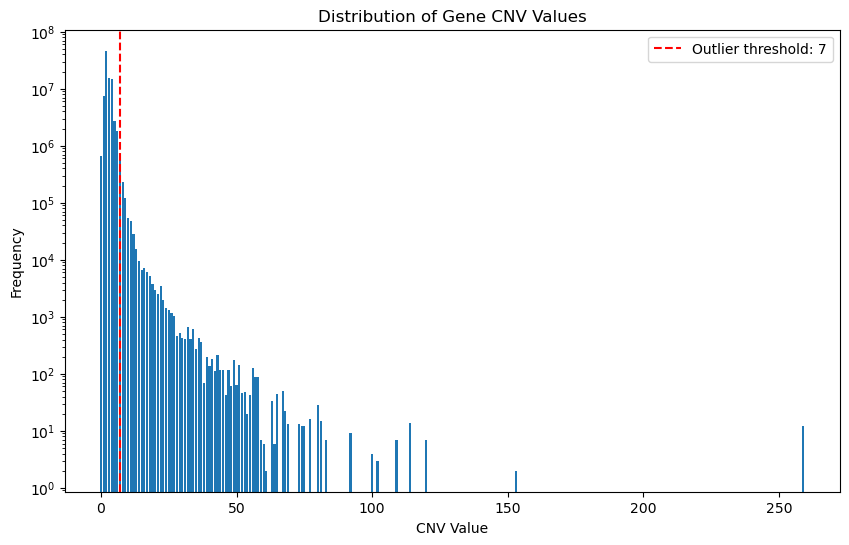

In [33]:
#### plot the gene_cnv_counts to see frequency of CNV values
outlier_threshold = 7
plot_gene_cnv_counts = gene_cnv_counts.sort_values(by = 'CNV Value', ascending=True)
plt.figure(figsize=(10,6))
plt.bar(plot_gene_cnv_counts['CNV Value'], plot_gene_cnv_counts['Frequency'])
plt.axvline(x=outlier_threshold, color='r', linestyle='--', label=f'Outlier threshold: {outlier_threshold}')
plt.title('Distribution of Gene CNV Values')
plt.xlabel('CNV Value')
plt.yscale('log')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [34]:
def gistic_scoring_mimic_amplification(files, file_dict_gene_dict, gene_id_translation_dict):
    """
    Mimics the GISTIC scoring for amplification events. This version will create a null based on the shuffled amplification values. 
    Also works to calculate the percentage of a chromosome the mutation covers
    
    Parameters:
    files (list): List of file paths to process.
    file_dict_gene_dict (dict): Dictionary mapping file names to gene dictionaries. contain the copy number values of each gene
    with >4 indicating high level amplification.

    
    Returns:
    dict: A dataframe with scores for each gene.
    1. 'gene': Gene identifier.
    2. 'gene_name': Human-readable gene name.
    3. 'Sample_size': Total number of samples (files) processed.
    4. 'amplification_count': Count of amplification events for the gene.
    5.  Amplification_sum (i.e. total log2(amplification CNV) across samples): the sum of log2 values of amplification CNV across samples. (-1 to adjust for diploid cells, so only amplification values and intensity are counted for)
        This is similar to GISTIC's approach of assessing amplification events.
    6.  Amplification_sum_prevalence (i.e. average log2(amplification CNV) across samples): the average log2 value of amplification CNV across samples. (amplification_sum / sample_count)
    7. frequency_percentage: Percentage of samples with amplification for the gene. (number of files where gene is amplfied significantly (CNV > 4) / total number of files * 100)
    8. 'gistic_score': GISTIC-like score for the gene based on average amplification value.
    9. 'p_value': P-value from the binomial test for amplification.
    10. 'q_value': Adjusted p-value for multiple testing (FDR).
    11. 'significant': Boolean indicating if the gene is significantly amplified.
    12. 'empirical_p_value': Empirical p-value based on the null distribution.
    13. 'empirical_q_value': Adjusted empirical p-value for multiple testing (FDR).
    14. 'empirical_significant': Boolean indicating if the gene is significantly amplified based on the empirical p-value.
    15. 'start': Start position of the gene on the chromosome.
    16. 'end': End position of the gene on the chromosome.
    17. 'length': Length of the gene in base pairs (end - start + 1).
    18. 'chromosome': Chromosome on which the gene is located.
    19. 'coverage_percentage': Percentage of the chromosome that the gene covers.
    """

    sample_count = len(files)

    ### create a dictionary to hold the chromosome lengths
    ### this will be used to calculate the percentage of the chromosome the mutation covers
    ### Note: The chromosome lengths are taken from the GRCh38 assembly
    ### These are the lengths of the chromosomes in base pairs
    ### This was taken from the nih website: https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_000001405.40/
    ### Tcga uses the GRCh38 assembly for the human genome.
    ### This information was found at https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/CNV_Pipeline/

    chromosome_lengths = {
        'chr1': 248956422,
        'chr2': 242193529,
        'chr3': 198295559,
        'chr4': 190214555,
        'chr5': 181538259,
        'chr6': 170805979,
        'chr7': 159345973,
        'chr8': 145138636,
        'chr9': 138394717,
        'chr10': 133797422,
        'chr11': 135086622,
        'chr12': 133275309,
        'chr13': 114364328,
        'chr14': 107043718,
        'chr15': 101991189,
        'chr16': 90338345,
        'chr17': 83257441,
        'chr18': 80373285,
        'chr19': 58617616,
        'chr20': 64444167,
        'chr21': 46709983,
        'chr22': 50818468,
        'chrX': 156040895,
        'chrY': 57227415
    }

    ### create a dictionary to hold the chromosome coverage for each gene
    #for file in files[0:1]:  # Read the first file to get the chromosome coverage
    # gene_chromosome_coverage = pd.DataFrame(columns=['gene', 'chromosome','start', 'end', 'coverage_percentage'])
    temp = pd.read_csv(files[0], sep='\t')
    gene_chrom_coverage = []
    for gene in tqdm(temp['gene_id'].unique(), desc='Calculating gene chromosome coverage'):
        ### get the chromosome, start and end positions for the gene
        ### and calculate the percentage of the chromosome the gene covers
        ### Note: This assumes that the gene_id is unique in the file
        ### If the gene_id is not unique, then this will only return the first occurrence of the gene_id
        ### Note: The chromosome, start and end positions are taken from the first occurrence of the gene_id
        ### Note: The coverage percentage is calculated as the length of the gene divided by the length of the chromosome
        gene_data = temp[temp['gene_id'] == gene]
        if not gene_data.empty:
            chromosome = gene_data['chromosome'].values[0]
            start = gene_data['start'].values[0]
            end = gene_data['end'].values[0]
            coverage_percentage = ((end - start + 1) / chromosome_lengths.get(chromosome, 1)) * 100
            gene_chrom_coverage.append({
                'gene': gene,
                'chromosome': chromosome,
                'start': start,
                'end': end,
                'length': end - start + 1,
                'coverage_percentage': coverage_percentage
            })
    # Convert to DataFrame
    gene_chromosome_coverage = pd.DataFrame(gene_chrom_coverage)

    ########################### creation of the calculations for the amplification effects #################################

   
    # Step 1: Count amplification events and accumulate values
    ### Initialize dictionaries to hold amplification counts and values
    ### amplification_dict will hold the count of amplification events for each gene

    amplification_dict = {}
    amp_values_sum = {}

    ### initialize amplification_dict with 0 for all genes
    all_genes = set()
    for f in files:
        all_genes.update(file_dict_gene_dict[f].keys())
    amplification_dict = {gene: 0 for gene in all_genes}
    amp_values_sum = {gene: 0 for gene in all_genes}

    ### amp_values_sum will hold the sum of values for each gene
    cnv_values = []
    for file in tqdm(files, desc = "Counting amplification events and accumulating values"):
        gene_dict = file_dict_gene_dict.get(file, {})
        for gene, value in gene_dict.items():
            ### skip if values is none
            # check if the value is NaN, 'NA', 'nan', or not a number
            ### this is to ensure that we only consider valid numerical values for amplification
            if pd.isnull(value) or value == 'NA' or value == 'nan' or not isinstance(value, (int, float, np.integer, np.floating)):
                cnv_values.append(0)
                amp_values_sum[gene] = amp_values_sum.get(gene, 0) + 0
                continue
            cnv_values.append(value)
            # Mimicking GISTIC scoring for amplification
            
            ### this section of code works to accumulate the amplification values for each gene
            ### if the value is less than or equal to 1, it indicates no amplification
            ### and we do not accumulate the value for that gene
            ### if the value is greater than 0, we accumulate the log2 of the value
            ### this is similar to GISTIC's approach of assessing amplification events
            ### capping the value at 7 to prevent outliers from skewing the results
            ### this is similar to GISTIC's approach of assessing amplification events
            ### log2 transformation is used to account for when values are 2 as in normal diploid cells
            ### and to reduce the impact of outliers on the results
            ### Note: GISTIC uses log2 transformation to reduce the impact of outliers
            if value <=1:  # Assuming values <=1 indicate no amplification
                amp_values_sum[gene] = amp_values_sum.get(gene, 0) + 0
            else:
                ### accumulate the values for each gene
                if value > 7: # prevent outliers from skewing the results
                    value = 7
                ### accumulate the sum of values for each gene
                amp_values_sum[gene] = amp_values_sum.get(gene, 0) + math.log2(value)-1  # -1 to adjust for diploid cells
            
            ### seperate check for high-level amplification
            ### assuming values >4 indicate high-level amplification
            ### this is similar to GISTIC's approach of assessing amplification events
            if value > 4:  # Assuming values >4 indicate high-level amplification
                ### accumulate the counts of amplification events for each gene
                amplification_dict[gene] = amplification_dict.get(gene, 0) + 1

    # Step 2: Binomial test per gene
    ### Perform binomial test for each gene
    # Note: The binomial test checks if the observed count is significantly greater than expected under the null hypothesis
    # where the null hypothesis is that the probability of amplification is p_null.
    # The alternative hypothesis is that the observed count is significantly greater than expected.
    # This is similar to GISTIC's approach of assessing significance of amplification events.
    # So if the hypothesis is rejected, it indicates that the gene is significantly amplified across the samples.
    p_null = 0.05  # Null hypothesis probability for binomial test

    genes = list(amplification_dict.keys())
    counts = [amplification_dict[g] for g in genes]
    p_values = []
    ### count is the number of significant/high-level amplification events observed for each gene
    # sample_count = len(files)  # Total number of samples (files)
    ### The p_null is set to 0.05, which is a common threshold for significance
    # alternative='greater' indicates we are testing if the observed count is significantly greater than expected
    for count in counts:
        result = binomtest(k=count, n=sample_count, p=p_null, alternative='greater')
        p_values.append(result.pvalue)

    ### Calculate a null distribution based on the shuffled amplification values
    # Create a null distribution by permuting the CNV values
    ### This will help in calculating empirical p-values
    ### Initialize a dictionary to hold the null distributions for each gene
    ### This will hold the counts of amplification events for each gene in the null distribution

    # shuffle the CNV values to create a null distribution
    np.random.seed(42)  # For reproducibility
    ### Initialize a dictionary to hold the null distributions for each gene
    null_distributions = {g: [] for g in genes}
    permutation_count = 1000  # Number of permutations to create a null distribution
    ### create quick permuted CNV matrix
    ### This will hold the CNV values for each gene across all samples
    permuted_cnv_values = np.random.permutation(cnv_values)
    ### Calculate the null distributions for each gene
    for gene in tqdm(genes, desc='Calculating null distributions without permuting every time'):
        ### This will help in calculating empirical p-values
        ### Null distribution counts the number of times the random value of the gene is a significant mutation >4 for CNV
        null_distributions[gene] = [np.sum(np.random.choice(permuted_cnv_values, size = sample_count)>4) for _ in range(permutation_count)]

    ### calculate empirical p-values based on the null distribution
    p_empirical_values = []
    for gene in genes:
        observed_count = amplification_dict.get(gene, 0)
        null_counts = null_distributions[gene]
        # Calculate the empirical p-value as the proportion of null counts greater than or equal to the observed count
        ### works by counting how many times the null distribution has a count greater than or equal to the observed count
        ### The empirical p-value is calculated as the proportion of null counts that are greater than or equal to the observed count
        ### this is divided by the total number of permutations plus one to account for the observed count itself
        ### This gives the empirical p-value for the gene
        ### Note: This is a more efficient way to calculate the empirical p-value
        ### if the p_empirical is less than the p_null, then the gene is considered significantly amplified
        ### this is similar to the binomial test, but uses the null distribution to calculate the p-value
        ### This is because the null distribution is based on the shuffled CNV values, which is more representative of the data
        p_empirical = (np.sum(np.array(null_counts)>= observed_count)+1) / (permutation_count +1)
        p_empirical_values.append(p_empirical)
    

    # Step 3: Adjust p-values for multiple testing
    rejected, q_values, _, _ = multipletests(p_values, method='fdr_bh')
    # Adjusted q-values are the p-values adjusted for multiple testing
    rejected_empirical, q_values_empirical, _, _ = multipletests(p_empirical_values, method='fdr_bh')

    # Adjusted q-values are the p-values adjusted for multiple testing
    # Note: `rejected` indicates which hypotheses are rejected (i.e., significant)
    ### my own double check
    my_own_rejects = [True if q < p_null else False for q in q_values]
    my_own_rejects_empirical = [True if q < p_null else False for q in q_values_empirical]

    ### collect the prevalence of the genes high amplification across the entire cohort of samples
    frequency_percentage = [100 * amplification_dict.get(gene, 0) / sample_count for gene in genes]

    # Note: GISTIC scoring is typically more complex and involves additional steps like segmenting the data,
    # but here we mimic it by averaging the amplification values across samples.
    # This is a simplified version and may not capture all nuances of GISTIC scoring.
    # GISTIC scores are calculated as the average amplification value across samples for each gene.
    # attempt at gistic scoring

    gene_amplification_sum = [amp_values_sum.get(gene, 0) for gene in genes] # This is the sum of log2 values of CNV values across samples for each gene,
    #-1 to adjust for diploid cells and essentially only count amplifications and not a negative value or incorrect reading due to deletion
    amp_values_prevalance = [(amp_values_sum.get(gene, 0) / sample_count) for gene in genes]
    # This is the average log2 value of CNV values across samples for each gene

    # Note: This is a simplified version of GISTIC scoring, which typically involves more complex calculations.
    gistic_scores = list(np.array(amp_values_prevalance) * (np.array(frequency_percentage)/100)) # This is a simplified version of GISTIC scoring
    ### balances strength * prevalence

    ### Translate gene IDs to gene names
    # This will replace gene IDs with human-readable gene names using the translation dictionary
    gene_names = [gene_id_translation_dict.get(gene, "NA") for gene in genes]

    ### essentiall the observed counts of amplification events for each gene
    # counts = [amplification_dict[g] for g in genes]

    # Step 4: Compile results
    results = []
    for gene, gene_name, count, amp_sum, pval, pval_empirical, qval, qval_empirical, reject, empirical_reject, freq, amp_sum_prev, gistic in zip(genes, gene_names, counts, gene_amplification_sum,
                                                                                                                                                 p_values, p_empirical_values, q_values, 
                                                                                                                                                 q_values_empirical, my_own_rejects, my_own_rejects_empirical, 
                                                                                                                                                 frequency_percentage, amp_values_prevalance, gistic_scores):
        results.append({
            'gene': gene,
            'gene_name': gene_name,
            'Sample_size': sample_count,  # Total number of samples (files)
            'amplification_count': count, # Count of significant amplification events for the gene across all samples
            'Amplification_sum (i.e. total log2(amplification CNV) across samples)': amp_sum, # Total log2 value of amplification CNV across samples
            'Amplification_sum_prevalence': amp_sum_prev,  # Average amplification (i.e. average log2(amplification CNV) across samples)
            'frequency_percentage': freq, # Percentage of samples with amplification for the gene
            'gistic_score': gistic,  # GISTIC-like score. i.e. calculated as amplification prevalance * frequency percentage of amplification
            'p_value': pval, # P-value from the binomial test for amplification
            'q_value': qval,  # Adjusted p-value for multiple testing (FDR)
            'significant': reject,  # Boolean indicating if the gene is significantly amplified based on the binomial test
            'empirical_p_value': pval_empirical, # Empirical p-value based on the null distribution
            'empirical_q_value': qval_empirical,  # Adjusted empirical p-value for multiple testing (FDR)
            'empirical_significant': empirical_reject # Boolean indicating if the gene is significantly amplified based on the empirical p-value
        })

    # Convert results to DataFrame for easier handling
    results = pd.DataFrame(results)
    results = results.sort_values(by='frequency_percentage', ascending=False)

    # Merge with chromosome coverage data
    results = results.merge(gene_chromosome_coverage, on='gene', how='left')
    return results

In [35]:
def gistic_scoring_mimic_deletion(files, file_dict_gene_dict, gene_id_translation_dict):
    """
    Mimics the GISTIC scoring for deletion events. This version will create a null based on the shuffled deletion values. 
    Also works to calculate the percentage of a chromosome the mutation covers
    
    Parameters:
    files (list): List of file paths to process.
    file_dict_gene_dict (dict): Dictionary mapping file names to gene dictionaries. contain the copy number values of each gene
    with <1 indicating high level deletion.

    
    Returns:
    dict: A dataframe with scores for each gene.
    1. 'gene': Gene identifier.
    2. 'gene_name': Human-readable gene name.
    3. 'Sample_size': Total number of samples (files) processed.
    4. 'deletion_count': Count of deletion events for the gene.
    5. 'deletion_sum (i.e. total log2(deletion CNV) across samples)': the sum of log2 values of deletion CNV across samples. 
        (-1 to adjust for diploid cells, so only deletion values and intensity are counted for)
    6. 'deletion_sum_prevalence (i.e. average log2(deletion CNV) across samples)': the average log2 value of deletion CNV across samples. (deletion_sum / sample_count)
    7. 'frequency_percentage': Percentage of samples with deletion for the gene.
    8. 'gistic_score': GISTIC-like score for the gene based on average deletion value.
    9. 'p_value': P-value from the binomial test for deletion .
    11. 'q_value': Adjusted p-value for multiple testing (FDR).
    14. 'significant': Boolean indicating if the gene is significantly deleted.
    12. 'empirical_p_value': Empirical p-value based on the null distribution.
    13. 'empirical_q_value': Adjusted empirical p-value for multiple testing (FDR).
    14. 'empirical_significant': Boolean indicating if the gene is significantly deleted based on the empirical p-value.
    15. 'start': Start position of the gene on the chromosome.
    16. 'end': End position of the gene on the chromosome.
    17. 'length': Length of the gene in base pairs (end - start + 1).
    18. 'chromosome': Chromosome on which the gene is located.
    19. 'coverage_percentage': Percentage of the chromosome that the gene covers.
    """
    sample_count = len(files)

    ### create a dictionary to hold the chromosome lengths
    ### this will be used to calculate the percentage of the chromosome the mutation covers
    ### Note: The chromosome lengths are taken from the GRCh38 assembly
    ### These are the lengths of the chromosomes in base pairs
    ### This was taken from the nih website: https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_000001405.40/
    chromosome_lengths = {
        'chr1': 248956422,
        'chr2': 242193529,
        'chr3': 198295559,
        'chr4': 190214555,
        'chr5': 181538259,
        'chr6': 170805979,
        'chr7': 159345973,
        'chr8': 145138636,
        'chr9': 138394717,
        'chr10': 133797422,
        'chr11': 135086622,
        'chr12': 133275309,
        'chr13': 114364328,
        'chr14': 107043718,
        'chr15': 101991189,
        'chr16': 90338345,
        'chr17': 83257441,
        'chr18': 80373285,
        'chr19': 58617616,
        'chr20': 64444167,
        'chr21': 46709983,
        'chr22': 50818468,
        'chrX': 156040895,
        'chrY': 57227415}
    
    ### create a dictionary to hold the chromosome coverage for each gene
    #for file in files[0:1]:  # Read the first file to get the chromosome coverage
    # gene_chromosome_coverage = pd.DataFrame(columns=['gene', 'chromosome','start', 'end', 'coverage_percentage'])
    temp = pd.read_csv(files[0], sep='\t')
    gene_chrom_coverage = []
    for gene in tqdm(temp['gene_id'].unique(), desc='Calculating gene chromosome coverage'):
        ### get the chromosome, start and end positions for the gene
        ### and calculate the percentage of the chromosome the gene covers
        ### Note: This assumes that the gene_id is unique in the file
        ### If the gene_id is not unique, then this will only return the first occurrence of the gene_id
        ### Note: The chromosome, start and end positions are taken from the first occurrence of the gene_id
        ### Note: The coverage percentage is calculated as the length of the gene divided by the length of the chromosome
        gene_data = temp[temp['gene_id'] == gene]
        if not gene_data.empty:
            chromosome = gene_data['chromosome'].values[0]
            start = gene_data['start'].values[0]
            end = gene_data['end'].values[0]
            coverage_percentage = ((end - start + 1) / chromosome_lengths.get(chromosome, 1)) * 100
            gene_chrom_coverage.append({
                'gene': gene,
                'chromosome': chromosome,
                'start': start,
                'end': end,
                'coverage_percentage': coverage_percentage
            })
    # Convert to DataFrame
    gene_chromosome_coverage = pd.DataFrame(gene_chrom_coverage)

    ########################### creation of the calculations for the amplification effects #################################

    p_null = 0.05  # Null hypothesis probability for binomial test
    # Step 1: Count amplification events and accumulate values
    ### Initialize dictionaries to hold amplification counts and values
    ### deletion_dict will hold the count of high level deletion events for each gene
    deletion_dict = {}
    del_values_sum = {}
    ## initialize deletion_dict with 0 for all genes
    all_genes = set()
    for f in files:
        all_genes.update(file_dict_gene_dict[f].keys())
    deletion_dict = {gene: 0 for gene in all_genes}
    del_values_sum = {gene: 0 for gene in all_genes}

    cnv_values = []
    for file in tqdm(files, desc = "Counting deletion events and accumulating values"):
        gene_dict = file_dict_gene_dict.get(file, {})
        for gene, value in gene_dict.items():
            ### skip if values is none
            ## check if the value is NaN, 'NA', 'nan', or not a number
            if pd.isnull(value) or value == 'NA' or value == 'nan' or not isinstance(value, (int, float, np.integer, np.floating)):
                cnv_values.append(0)
                del_values_sum[gene] = del_values_sum.get(gene, 0) + 0
                continue
            cnv_values.append(value)
            # Mimicking GISTIC scoring for deletion
            if value == 1:
                ### accumulate the sum of values for each gene
                del_values_sum[gene] = del_values_sum.get(gene, 0) + -1 # -1 to account for a lesser deletion
            if value < 1:  # Assuming values <1 indicate high-level deletion
                deletion_dict[gene] = deletion_dict.get(gene, 0) + 1 ### accumulate the counts of deletion events for each gene
                del_values_sum[gene] = del_values_sum.get(gene, 0) + -2  # -2 to account for high-level deletion

    # Step 2: Binomial test per gene
    genes = list(deletion_dict.keys())
    ### essentiall the observed counts of deletion events for each gene
    counts = [deletion_dict[g] for g in genes]
    p_values = []

    ### Perform binomial test for each gene
    # Note: The binomial test checks if the observed count is significantly greater than expected under the null hypothesis
    # where the null hypothesis is that the probability of deletion is p_null.
    # The alternative hypothesis is that the observed count is significantly greater than expected.
    # This is similar to GISTIC's approach of assessing significance of deletion events.
    # So if the hypothesis is rejected, it indicates that the gene is significantly deleted across the samples.
    for count in counts:
        result = binomtest(k=count, n=sample_count, p=p_null, alternative='greater')
        p_values.append(result.pvalue)

    ### Calculate a null distribution based on the shuffled deletion values
    # Create a null distribution by permuting the CNV values
    ### This will help in calculating empirical p-values
    ### Initialize a dictionary to hold the null distributions for each gene
    ### This will hold the counts of deletion events for each gene in the null distribution

    # shuffle the CNV values to create a null distribution
    np.random.seed(42)  # For reproducibility
    ### Initialize a dictionary to hold the null distributions for each gene
    null_distributions = {g: [] for g in genes}
    permutation_count = 1000  # Number of permutations to create a null distribution

    permuted_cnv_matrix = np.random.permutation(cnv_values)
    ### Create a quick permuted CNV matrix

    for gene in tqdm(genes, desc='Calculating null distributions'):
        ### This will help in calculating empirical p-values
        null_distributions[gene] = [np.sum(np.random.choice(permuted_cnv_matrix, size = sample_count) < 1) for _ in range(permutation_count)]

    ### calculate empirical p-values based on the null distribution
    p_empirical_values = []
    for gene in genes:
        observed_count = deletion_dict.get(gene, 0)
        null_counts = null_distributions[gene]
        # Calculate the empirical p-value as the proportion of null counts greater than or equal to the observed count
        ### works by counting how many times the null distribution has a count greater than or equal to the observed count
        ### The empirical p-value is calculated as the proportion of null counts that are greater than or equal to the observed count
        ### this is divided by the total number of permutations plus one to account for the observed count itself
        ### Thi gives the empirical p-value for the gene
        ### Note: This is a more efficient way to calculate the empirical p-value
        ### if the p_empirical is less than the p_null, then the gene is considered significantly amplified
        ### this is similar to the binomial test, but uses the null distribution to calculate the p-value
        ### This is because the null distribution is based on the shuffled CNV values, which is more representative of the data
        p_empirical = (np.sum(np.array(null_counts)>= observed_count)+1) / (permutation_count +1)
        p_empirical_values.append(p_empirical)

    # Step 3: Adjust p-values for multiple testing
    rejected, q_values, _, _ = multipletests(p_values, method='fdr_bh')
    # Adjusted q-values are the p-values adjusted for multiple testing
    rejected_empirical, q_values_empirical, _, _ = multipletests(p_empirical_values, method='fdr_bh')
    
    # Adjusted q-values are the p-values adjusted for multiple testing
    # Note: `rejected` indicates which hypotheses are rejected (i.e., significant)
    ### my own double check
    my_own_rejects = [True if q < p_null else False for q in q_values]
    my_own_rejects_empirical = [True if q < p_null else False for q in q_values_empirical]


    ### collect the prevalence of the genes high amplification across the entire cohort of samples
    frequency_percentage = [100 * deletion_dict.get(gene, 0) / sample_count for gene in genes]

    # Note: GISTIC scoring is typically more complex and involves additional steps like segmenting the data,
    # but here we mimic it by averaging the amplification values across samples.
    # This is a simplified version and may not capture all nuances of GISTIC scoring.
    # GISTIC scores are calculated as the average deletion value across samples for each gene.
    # attempt at gistic scoring
    gene_deletion_sum = [del_values_sum.get(gene, 0) for gene in genes] # This is the sum of values of CNV values across samples for each gene,
    # counted only deletions -1 for when ==1 and -2 for when <1
    # essentially only count deletions and not a negative value or reading due to amplification
    del_values_sum = {gene: abs(val) for gene, val in del_values_sum.items()}   # make all values positive for deletion sum and prevalence
    deletion_sum_prevalance = [(del_values_sum.get(gene, 0) / sample_count) for gene in genes]
    ## This is the average deletion value of CNV values across samples for each gene

    # This is a simplified version of GISTIC scoring
    # GISTIC scores are calculated as the average deletion value across samples multiplied by the frequency of deletion
    gistic_scores = list(np.array(deletion_sum_prevalance) * (np.array(frequency_percentage)/100))  # This is a simplified version of GISTIC scoring
    
    ## Translate gene IDs to gene names
    ## This will replace gene IDs with human-readable gene names using the translation dictionary
    gene_names = [gene_id_translation_dict.get(gene, "NA") for gene in genes]

    ### essentially the observed counts of deletion events for each gene
    # counts = [deletion_dict[g] for g in genes]

    # Step 4: Compile results
    results = []
    for gene, gene_name, count, del_sum_count, del_sum_prev, freq, gistic, pval, pval_empirical, qval, qval_empirical, reject, empirical_reject in zip(genes, gene_names, counts, gene_deletion_sum, deletion_sum_prevalance, 
                                                                                                                                                         frequency_percentage, gistic_scores, p_values, p_empirical_values, q_values, 
                                                                                                                                                         q_values_empirical, my_own_rejects, my_own_rejects_empirical):
        results.append({
            'gene': gene,
            'gene_name': gene_name,
            'Sample_size': sample_count,  # Total number of samples (files)
            'deletion_count': count,
            'Deletion_sum (i.e. total deletion CNV count across samples)': del_sum_count,  # Total deletion CNV count across samples
            'Deletion_sum_prevalence': del_sum_prev,  # Average deletion CNV count (i.e. average (deletion CNV count) across samples)'
            'frequency_percentage': freq, # Percentage of samples with significant deletion (<1) for the gene
            'gistic_score': gistic,  # GISTIC-like score. i.e. calculated as deletion prevalance * frequency percentage of deletion
            'p_value': pval, # P-value from the binomial test for deletion
            'q_value': qval, # Adjusted p-value for multiple testing (FDR)
            'significant': reject, # Boolean indicating if the gene is significantly deleted based on the binomial test
            'empirical_p_value': pval_empirical, # Empirical p-value based on the null distribution
            'empirical_q_value': qval_empirical, # Adjusted empirical p-value for multiple testing (FDR)
            'empirical_significant': empirical_reject, # Boolean indicating if the gene is significantly deleted based on the empirical p-value
        })

    # Convert results to DataFrame for easier handling
    results = pd.DataFrame(results)
    results = results.sort_values(by='frequency_percentage', ascending=False)

    # Merge with chromosome coverage data
    results = results.merge(gene_chromosome_coverage, on='gene', how='left')
    return results

### HPV+

#### Amplification

In [36]:
hpv_pos_amplification_results = gistic_scoring_mimic_amplification(HPV_positive_files, file_dict_gene_dict, gene_id_translation_dict)

Calculating gene chromosome coverage: 100%|██████████| 60623/60623 [01:45<00:00, 574.68it/s]
Counting amplification events and accumulating values: 100%|██████████| 221/221 [00:32<00:00,  6.76it/s]
Calculating null distributions without permuting every time: 100%|██████████| 60623/60623 [12:58<00:00, 77.90it/s]


In [37]:
hpv_pos_amplification_results

,gene,gene_name,Sample_size,amplification_count,Amplification_sum (i.e. total log2(amplification CNV) across samples),Amplification_sum_prevalence,frequency_percentage,gistic_score,p_value,q_value,significant,empirical_p_value,empirical_q_value,empirical_significant,chromosome,start,end,length,coverage_percentage
0,ENSG00000242512.9,LINC01206,221,77,202.286944,0.915326,34.841629,0.318914,2.844552e-43,2.463504e-39,True,0.000999,0.011719,True,chr3,181952343,182035644,83302,0.042009
1,ENSG00000252257.1,RN7SKP265,221,77,202.286944,0.915326,34.841629,0.318914,2.844552e-43,2.463504e-39,True,0.000999,0.011719,True,chr3,181968459,181968681,223,0.000112
2,ENSG00000266317.2,RN7SL703P,221,77,202.286944,0.915326,34.841629,0.318914,2.844552e-43,2.463504e-39,True,0.000999,0.011719,True,chr3,181813401,181813702,302,0.000152
3,ENSG00000213155.4,AC007547.1,221,77,202.286944,0.915326,34.841629,0.318914,2.844552e-43,2.463504e-39,True,0.000999,0.011719,True,chr3,181866351,181867154,804,0.000405
4,ENSG00000239805.1,AC007547.2,221,77,202.286944,0.915326,34.841629,0.318914,2.844552e-43,2.463504e-39,True,0.000999,0.011719,True,chr3,181847526,181847885,360,0.000182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000255350.1,MTCO1P15,221,0,9.339850,0.042262,0.000000,0.000000,1.000000e+00,1.000000e+00,False,1.000000,1.000000,False,chr11,103404309,103405834,1526,0.001130
60619,ENSG00000227120.1,AC009238.1,221,0,35.849625,0.162215,0.000000,0.000000,1.000000e+00,1.000000e+00,False,1.000000,1.000000,False,chr2,95436133,95436556,424,0.000175
60620,ENSG00000226540.2,GAPDHP73,221,0,36.264663,0.164093,0.000000,0.000000,1.000000e+00,1.000000e+00,False,1.000000,1.000000,False,chr6,135619165,135620171,1007,0.000590
60621,ENSG00000053328.8,METTL24,221,0,35.924813,0.162556,0.000000,0.000000,1.000000e+00,1.000000e+00,False,1.000000,1.000000,False,chr6,110245928,110358272,112345,0.065773


In [38]:
print(len(set(hpv_pos_amplification_results['gene_name'])))

59390


In [39]:
top_hpv_pos_amplification_results = hpv_pos_amplification_results[hpv_pos_amplification_results['q_value']<0.05][hpv_pos_amplification_results['empirical_q_value'] < 0.05]

/var/folders/5p/swntgnbj3fbfxkx02kt3fq980000gn/T/ipykernel_54044/3754886839.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_hpv_pos_amplification_results = hpv_pos_amplification_results[hpv_pos_amplification_results['q_value']<0.05][hpv_pos_amplification_results['empirical_q_value'] < 0.05]


In [40]:
print(len(set(top_hpv_pos_amplification_results['gene_name'])))

2715


In [41]:
hpv_pos_amplification_results.to_csv('Results/CNV results/HPV positive amplification genes.csv', index=False)

#### Deletion

In [42]:
hpv_pos_deletion_results = gistic_scoring_mimic_deletion(HPV_positive_files, file_dict_gene_dict, gene_id_translation_dict)

Calculating null distributions: 100%|██████████| 60623/60623 [13:04<00:00, 77.23it/s]


In [43]:
hpv_pos_deletion_results.sort_values(by = 'frequency_percentage', ascending=False)

,gene,gene_name,Sample_size,deletion_count,Deletion_sum (i.e. total deletion CNV count across samples),Deletion_sum_prevalence,frequency_percentage,gistic_score,p_value,q_value,significant,empirical_p_value,empirical_q_value,empirical_significant,chromosome,start,end,coverage_percentage
0,ENSG00000169239.13,CA5B,221,33,-140,0.633484,14.932127,0.094593,2.284493e-08,0.000016,True,0.000999,0.025404,True,chrX,15688830,15788411,0.063818
2,ENSG00000275800.1,EIF5P2,221,33,-140,0.633484,14.932127,0.094593,2.284493e-08,0.000016,True,0.000999,0.025404,True,chrX,19496378,19497721,0.000861
3,ENSG00000200620.1,AC112497.1,221,33,-140,0.633484,14.932127,0.094593,2.284493e-08,0.000016,True,0.000999,0.025404,True,chrX,15716208,15716346,0.000089
4,ENSG00000186312.10,CA5BP1,221,33,-140,0.633484,14.932127,0.094593,2.284493e-08,0.000016,True,0.000999,0.025404,True,chrX,15674932,15703724,0.018452
1,ENSG00000279413.1,AC112497.2,221,33,-140,0.633484,14.932127,0.094593,2.284493e-08,0.000016,True,0.000999,0.025404,True,chrX,15702602,15703243,0.000411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23196,ENSG00000182035.12,ADIG,221,0,-16,0.072398,0.000000,0.000000,1.000000e+00,1.000000,False,1.000000,1.000000,False,chr20,38581195,38588463,0.011280
23197,ENSG00000205238.9,SPDYE2,221,0,-9,0.040724,0.000000,0.000000,1.000000e+00,1.000000,False,1.000000,1.000000,False,chr7,102551232,102562308,0.006952
23198,ENSG00000224760.4,C1DP3,221,0,-36,0.162896,0.000000,0.000000,1.000000e+00,1.000000,False,1.000000,1.000000,False,chr10,80024737,80025159,0.000316
23199,ENSG00000232748.3,AC135050.1,221,0,-21,0.095023,0.000000,0.000000,1.000000e+00,1.000000,False,1.000000,1.000000,False,chr16,31056460,31062803,0.007022


In [44]:
hpv_pos_deletion_results.to_csv('Results/CNV results/HPV positive deletion genes.csv', index=False)

In [45]:
hpv_pos_deletion_results

,gene,gene_name,Sample_size,deletion_count,Deletion_sum (i.e. total deletion CNV count across samples),Deletion_sum_prevalence,frequency_percentage,gistic_score,p_value,q_value,significant,empirical_p_value,empirical_q_value,empirical_significant,chromosome,start,end,coverage_percentage
0,ENSG00000169239.13,CA5B,221,33,-140,0.633484,14.932127,0.094593,2.284493e-08,0.000016,True,0.000999,0.025404,True,chrX,15688830,15788411,0.063818
1,ENSG00000279413.1,AC112497.2,221,33,-140,0.633484,14.932127,0.094593,2.284493e-08,0.000016,True,0.000999,0.025404,True,chrX,15702602,15703243,0.000411
2,ENSG00000275800.1,EIF5P2,221,33,-140,0.633484,14.932127,0.094593,2.284493e-08,0.000016,True,0.000999,0.025404,True,chrX,19496378,19497721,0.000861
3,ENSG00000200620.1,AC112497.1,221,33,-140,0.633484,14.932127,0.094593,2.284493e-08,0.000016,True,0.000999,0.025404,True,chrX,15716208,15716346,0.000089
4,ENSG00000186312.10,CA5BP1,221,33,-140,0.633484,14.932127,0.094593,2.284493e-08,0.000016,True,0.000999,0.025404,True,chrX,15674932,15703724,0.018452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000231880.2,KF459542.1,221,0,-15,0.067873,0.000000,0.000000,1.000000e+00,1.000000,False,1.000000,1.000000,False,chr11,47577725,47578277,0.000409
60619,ENSG00000223727.6,AC034195.1,221,0,-31,0.140271,0.000000,0.000000,1.000000e+00,1.000000,False,1.000000,1.000000,False,chr3,3250687,3627296,0.189924
60620,ENSG00000267233.1,HNRNPA3P16,221,0,-6,0.027149,0.000000,0.000000,1.000000e+00,1.000000,False,1.000000,1.000000,False,chr18,50814392,50815730,0.001666
60621,ENSG00000286456.1,AC016769.5,221,0,-4,0.018100,0.000000,0.000000,1.000000e+00,1.000000,False,1.000000,1.000000,False,chr7,64612535,64614834,0.001443


In [46]:
print(len(set(hpv_pos_deletion_results['gene_name'])))

59390


In [47]:
top_hpv_pos_deletion_results = hpv_pos_deletion_results[hpv_pos_deletion_results['q_value']<0.05][hpv_pos_deletion_results['empirical_q_value'] < 0.05]

/var/folders/5p/swntgnbj3fbfxkx02kt3fq980000gn/T/ipykernel_54044/1396174384.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_hpv_pos_deletion_results = hpv_pos_deletion_results[hpv_pos_deletion_results['q_value']<0.05][hpv_pos_deletion_results['empirical_q_value'] < 0.05]


In [48]:
print(len(set(top_hpv_pos_deletion_results['gene_name'])))

2334


### HPV-

#### Amplification

In [49]:
hpv_neg_amplification_results = gistic_scoring_mimic_amplification(HPV_negative_files, file_dict_gene_dict, gene_id_translation_dict)

Calculating gene chromosome coverage: 100%|██████████| 60623/60623 [01:45<00:00, 576.20it/s]
Counting amplification events and accumulating values: 100%|██████████| 2218/2218 [05:32<00:00,  6.67it/s]
Calculating null distributions without permuting every time: 100%|██████████| 60623/60623 [47:17<00:00, 21.36it/s]


In [50]:
hpv_neg_amplification_results

,gene,gene_name,Sample_size,amplification_count,Amplification_sum (i.e. total log2(amplification CNV) across samples),Amplification_sum_prevalence,frequency_percentage,gistic_score,p_value,q_value,significant,empirical_p_value,empirical_q_value,empirical_significant,chromosome,start,end,length,coverage_percentage
0,ENSG00000216058.1,MIR944,2218,842,2037.446037,0.918596,37.962128,0.348719,0.0,0.0,True,0.000999,0.003858,True,chr3,189829922,189830009,88,0.000044
1,ENSG00000230115.1,TPRG1-AS2,2218,838,2034.022886,0.917053,37.781785,0.346479,0.0,0.0,True,0.000999,0.003858,True,chr3,189238686,189240594,1909,0.000963
2,ENSG00000073282.14,TP63,2218,830,2018.173416,0.909907,37.421100,0.340497,0.0,0.0,True,0.000999,0.003858,True,chr3,189631389,189897276,265888,0.134087
3,ENSG00000230077.1,MTAPP2,2218,830,2031.770475,0.916037,37.421100,0.342791,0.0,0.0,True,0.000999,0.003858,True,chr3,189969030,189969861,832,0.000420
4,ENSG00000238026.1,AC117434.1,2218,827,2003.074297,0.903099,37.285843,0.336728,0.0,0.0,True,0.000999,0.003858,True,chr3,176113702,176114537,836,0.000422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000182484.15_PAR_Y,WASH6P,2218,0,0.000000,0.000000,0.000000,0.000000,1.0,1.0,False,1.000000,1.000000,False,chrY,57207346,57212230,4885,0.008536
60619,ENSG00000230724.9,LINC01001,2218,0,15.849625,0.007146,0.000000,0.000000,1.0,1.0,False,1.000000,1.000000,False,chr11,127204,139612,12409,0.009186
60620,ENSG00000283274.1,5_8S_rRNA,2218,0,0.000000,0.000000,0.000000,0.000000,1.0,1.0,False,1.000000,1.000000,False,chr14,16057472,16057622,151,0.000141
60621,ENSG00000277120.5_PAR_Y,MIR6089,2218,0,0.000000,0.000000,0.000000,0.000000,1.0,1.0,False,1.000000,1.000000,False,chrY,2609191,2609254,64,0.000112


In [51]:
len(set(hpv_neg_amplification_results['gene_name']))

59390

In [52]:
top_hpv_neg_amplification_results = hpv_neg_amplification_results[hpv_neg_amplification_results['q_value']<0.05][hpv_neg_amplification_results['empirical_q_value'] < 0.05]

/var/folders/5p/swntgnbj3fbfxkx02kt3fq980000gn/T/ipykernel_54044/4053609162.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_hpv_neg_amplification_results = hpv_neg_amplification_results[hpv_neg_amplification_results['q_value']<0.05][hpv_neg_amplification_results['empirical_q_value'] < 0.05]


In [53]:
len(set(top_hpv_neg_amplification_results['gene_name']))

17212

In [54]:
hpv_neg_amplification_results.to_csv('Results/CNV results/HPV negative amplification genes.csv', index=False)

#### Deletion

In [55]:
hpv_neg_deletion_results = gistic_scoring_mimic_deletion(HPV_negative_files, file_dict_gene_dict, gene_id_translation_dict)

Calculating null distributions: 100%|██████████| 60623/60623 [47:57<00:00, 21.07it/s]


In [56]:
hpv_neg_deletion_results

,gene,gene_name,Sample_size,deletion_count,Deletion_sum (i.e. total deletion CNV count across samples),Deletion_sum_prevalence,frequency_percentage,gistic_score,p_value,q_value,significant,empirical_p_value,empirical_q_value,empirical_significant,chromosome,start,end,coverage_percentage
0,ENSG00000232634.1,NEFLP1,2218,538,-1172,0.528404,24.256087,0.128170,4.542668e-206,1.376951e-202,True,0.000999,0.020412,True,chrY,21221106,21222089,0.001719
1,ENSG00000271123.1,ELOCP5,2218,538,-1170,0.527502,24.256087,0.127951,4.542668e-206,1.376951e-202,True,0.000999,0.020412,True,chrY,21631683,21632015,0.000582
2,ENSG00000226042.1,CDY10P,2218,538,-1170,0.527502,24.256087,0.127951,4.542668e-206,1.376951e-202,True,0.000999,0.020412,True,chrY,21637475,21639041,0.002738
3,ENSG00000230029.1,CDY11P,2218,538,-1170,0.527502,24.256087,0.127951,4.542668e-206,1.376951e-202,True,0.000999,0.020412,True,chrY,21696570,21698220,0.002885
4,ENSG00000223637.7,RBMY2EP,2218,538,-1172,0.528404,24.256087,0.128170,4.542668e-206,1.376951e-202,True,0.000999,0.020412,True,chrY,21394991,21401585,0.011524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60618,ENSG00000250326.2,AC104596.1,2218,0,-182,0.082056,0.000000,0.000000,1.000000e+00,1.000000e+00,False,1.000000,1.000000,False,chr4,142933195,143184861,0.132307
60619,ENSG00000260012.1,AC007494.1,2218,0,-96,0.043282,0.000000,0.000000,1.000000e+00,1.000000e+00,False,1.000000,1.000000,False,chr16,47262741,47263500,0.000841
60620,ENSG00000110851.12,PRDM4,2218,0,-48,0.021641,0.000000,0.000000,1.000000e+00,1.000000e+00,False,1.000000,1.000000,False,chr12,107732871,107761272,0.021311
60621,ENSG00000273367.1,AL355472.3,2218,0,-10,0.004509,0.000000,0.000000,1.000000e+00,1.000000e+00,False,1.000000,1.000000,False,chr1,234372186,234372811,0.000251


In [57]:
print(len(set(hpv_neg_deletion_results['gene_name'])))

59390


In [58]:
top_hpv_neg_deletion_results = hpv_neg_deletion_results[hpv_neg_deletion_results['q_value']<0.05][hpv_neg_deletion_results['empirical_q_value'] < 0.05]

/var/folders/5p/swntgnbj3fbfxkx02kt3fq980000gn/T/ipykernel_54044/595673578.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_hpv_neg_deletion_results = hpv_neg_deletion_results[hpv_neg_deletion_results['q_value']<0.05][hpv_neg_deletion_results['empirical_q_value'] < 0.05]


In [59]:
print(len(set(top_hpv_neg_deletion_results['gene_name'])))

2881


In [60]:
hpv_neg_deletion_results.to_csv('Results/CNV results/HPV negative deletion genes.csv', index=False)